## Comments for Q1 to Q5

<span style="color: red;"> 
Q1. 2/4 – your used numbers are not there in your given reference.

Q2.  5/5

Q3. 13/15 – no documentation, no mention of log scale in axis label.

Q4. 18/20 – no documentation, didn’t take care of the ‘nan’ case.

Q5. 3/5 – didn’t explain how you got the number.


 </span>

# PROBLEM 6

In [21]:
# Part A

def factorial(n):
    if n == 0:
        return 1
    else:
        fact = 1
        for i in range(1, n + 1):
            fact = fact * i
        return fact

## <span style="color: red;"> 5 </span>

In [24]:
# Part B

def exponential_taylor(x):
    result = 0
    term = 1
    n = 0
    
    while True:
        current_factorial = factorial(n)
        term = (x ** n) / current_factorial
        
        result += term

        if term < 0.0000000001:
            break
        
        n += 1

    return result

## <span style="color: red;"> 6  termination condition?? </span>

In [25]:
# PART C

import time

x_values = [0.1, 20]

for x in x_values:

    start_time = time.time()
    result = exponential_taylor(x)
    end_time = time.time()
    print(f"e^{x} = {result}")
    print("Time taken: " + str(end_time - start_time) + " seconds")
    print("-----------------------")

e^0.1 = 1.1051709180753966
Time taken: 0.0 seconds
-----------------------
e^20 = 485165195.40979016
Time taken: 0.0 seconds
-----------------------


## <span style="color: red;"> 2 </span>

In [26]:
# PART 4

def exponential_rec(x):
    term = 1
    cumulative_sum = term
    n = 1
    terms = [term]
    cumulative_sums = [cumulative_sum]
    
    while True:
        term = term * (x / n)
        cumulative_sum += term
        terms.append(term)
        cumulative_sums.append(cumulative_sum)
        
        if abs(term) < 0.0000000001:
            break
        
        n += 1
    
    return cumulative_sum, terms, cumulative_sums

## <span style="color: red;"> 8 termination condition </span>

In [27]:
# PART 5

import time

def compare_timing(x_values):
    for x in x_values:
        print(f"\nCalculating e^{x}...")

        start_time = time.time()
        result_rec, terms_rec, cumulative_rec = exponential_rec(x)
        end_time = time.time()
        print(f"Recurrence Relation Result: e^{x} = {result_rec}")
        # print("Terms:", terms_rec)
        # print("Cumulative Sums:", cumulative_rec)
        print(f"Time taken (recurrence relation): {end_time - start_time} seconds")
        
        start_time = time.time()
        result_taylor = exponential_taylor(x)
        end_time = time.time()
        print(f"Taylor Series Result: e^{x} = {result_taylor}")
        print(f"Time taken (Taylor series): {end_time - start_time} seconds")

## <span style="color: red;"> 2 </span>

In [28]:
# PART 6

import numpy as np

def compare_with_numpy(x_values):
    for x in x_values:
        numpy_result = np.exp(x)
        recurrence_result, terms_rec, cumulative_rec = exponential_rec(x)
        discrepancy = abs(recurrence_result - numpy_result)
        print(f"\nNumPy Result for e^{x}: {numpy_result}")
        print(f"Recurrence Relation Result for e^{x}: {recurrence_result}")
        # print(f"Terms Calculated: {terms_rec}")
        # print(f"Cumulative Sums: {cumulative_rec}")
        print(f"Discrepancy: {discrepancy}")

compare_timing(x_values)
compare_with_numpy(x_values)


Calculating e^0.1...
Recurrence Relation Result: e^0.1 = 1.1051709180753966
Time taken (recurrence relation): 0.0 seconds
Taylor Series Result: e^0.1 = 1.1051709180753966
Time taken (Taylor series): 0.0 seconds

Calculating e^20...
Recurrence Relation Result: e^20 = 485165195.40979046
Time taken (recurrence relation): 0.0 seconds
Taylor Series Result: e^20 = 485165195.40979016
Time taken (Taylor series): 0.0 seconds

NumPy Result for e^0.1: 1.1051709180756477
Recurrence Relation Result for e^0.1: 1.1051709180753966
Discrepancy: 2.511324481702104e-13

NumPy Result for e^20: 485165195.4097903
Recurrence Relation Result for e^20: 485165195.40979046
Discrepancy: 1.7881393432617188e-07


## <span style="color: red;"> 2 </span>

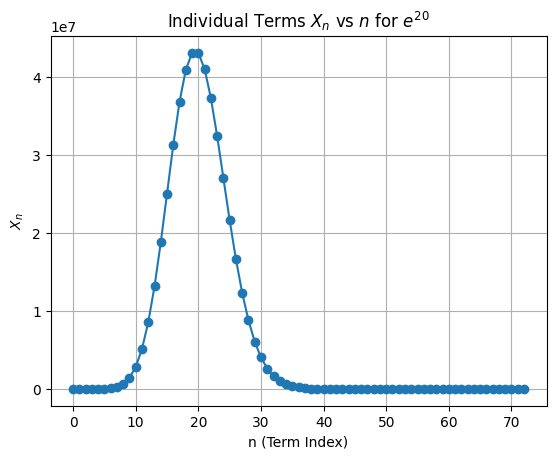

In [29]:
# PART 7

def plot_terms(x):
    _, terms, _ = exponential_rec(x)
    n_values = list(range(len(terms)))
    plt.plot(n_values, terms, marker='o')
    plt.title(f"Individual Terms $X_n$ vs $n$ for $e^{{{x}}}$")
    plt.xlabel("n (Term Index)")
    plt.ylabel("$X_n$")
    plt.grid()
    plt.show()

plot_terms(20)

## <span style="color: red;"> 9 turning point?
 </span>

In [30]:
# PART 8

def evaluate_and_compare_negative(x):
    recurrence_result, _, _ = exponential_rec(x)
    numpy_result = np.exp(x)
    discrepancy = abs(recurrence_result - numpy_result)
    print(f"Recurrence Relation Result for e^{x}: {recurrence_result}")
    print(f"NumPy Result for e^{x}: {numpy_result}")
    print(f"Discrepancy: {discrepancy}")

evaluate_and_compare_negative(-20)

Recurrence Relation Result for e^-20: 6.164184854939453e-09
NumPy Result for e^-20: 2.061153622438558e-09
Discrepancy: 4.1030312325008945e-09


## <span style="color: red;"> 8 explanation?? </span>

In [31]:
# PART 9

def evaluate_negative_better(x):
    if x < 0:
        positive_result, _, _ = exponential_rec(-x)
        return 1 / positive_result
    else:
        return exponential_rec(x)[0]

def evaluate_both_methods(x):
    inefficient_result, _, _ = exponential_rec(x)
    efficient_result = evaluate_negative_better(x)
    numpy_result = np.exp(x)
    print(f"Inefficient Recurrence Relation Result for e^{x}: {inefficient_result}")
    print(f"Efficient Method Result for e^{x}: {efficient_result}")
    print(f"NumPy Result for e^{x}: {numpy_result}")
    print(f"Discrepancy (Efficient): {abs(efficient_result - numpy_result)}")
    print(f"Discrepancy (Inefficient): {abs(inefficient_result - numpy_result)}")

evaluate_both_methods(-20)

Inefficient Recurrence Relation Result for e^-20: 6.164184854939453e-09
Efficient Method Result for e^-20: 2.061153622438557e-09
NumPy Result for e^-20: 2.061153622438558e-09
Discrepancy (Efficient): 8.271806125530277e-25
Discrepancy (Inefficient): 4.1030312325008945e-09


## <span style="color: red;"> 2 </span>